In [1]:
#Loading the libraries

import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#Reading train/test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [61]:
#Printing first two rows of train dataset
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [62]:
#Checking Null Values in each features in train dataset
result = train.isnull().sum()/(len(train)) * 100 
result

id                        0.000000
belongs_to_collection    79.866667
budget                    0.000000
genres                    0.233333
homepage                 68.466667
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.266667
popularity                0.000000
poster_path               0.033333
production_companies      5.200000
production_countries      1.833333
release_date              0.000000
runtime                   0.066667
spoken_languages          0.666667
status                    0.000000
tagline                  19.900000
title                     0.000000
Keywords                  9.200000
cast                      0.433333
crew                      0.533333
revenue                   0.000000
dtype: float64

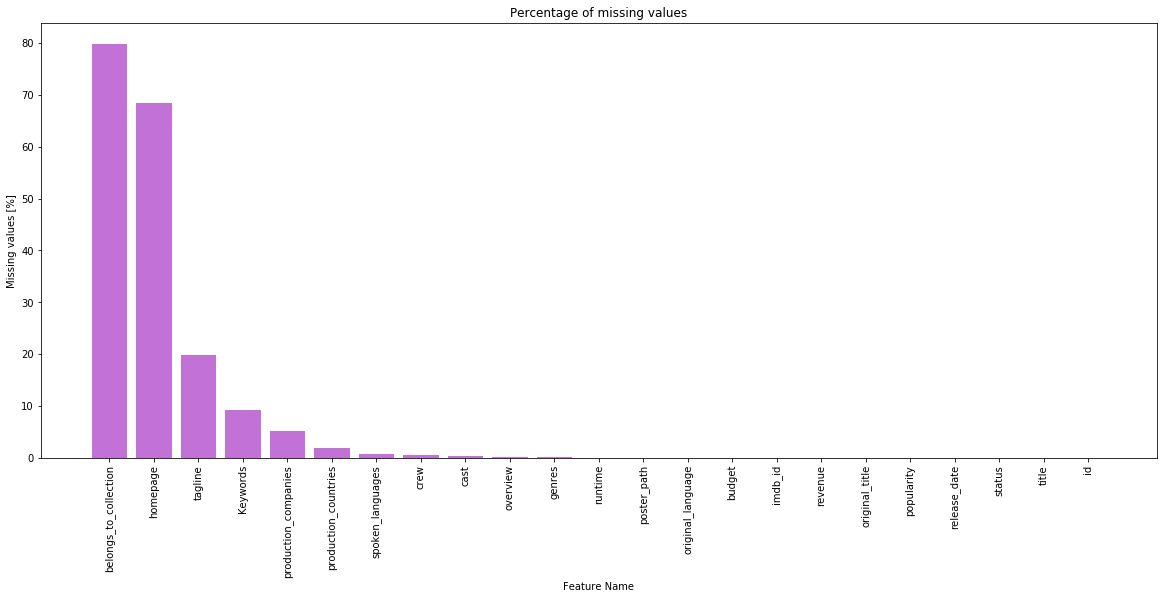

In [63]:
#Visualization of null values
result = train.isnull().sum()/(len(train)) * 100 
result = result.sort_values(ascending=False)
plt.figure(figsize=(20,8))
plt.bar(result.index,result.values, color=(0.7, 0.3, 0.8, 0.8))
plt.xticks(rotation = 90);
plt.title("Percentage of missing values")
plt.xlabel("Feature Name")
plt.ylabel("Missing values [%]")
plt.show();

In [64]:
#removing these features because of high percentage of null values
train = train.drop(columns=['belongs_to_collection','homepage'])
test = test.drop(columns=['belongs_to_collection','homepage'])

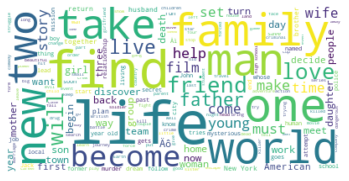

In [65]:
#Using word cloud for overview column

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

#filling overview null values with empty
train.overview = train.overview.fillna("")


review = train.overview[0:]


text = " ".join(review for review in train.overview)


from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [66]:
#Extracting features genres
def getGenres(ftr):
    genres_list = []
    if isinstance(ftr,str):
        
        while ftr.find("name") != -1:
            genres_list.append(ftr.replace('{','').replace('}','').replace('[','').replace(']','').split(',')[1].split(':')[1].strip().replace("'","")) 
            ftr = ftr[ftr.find(genres_list[len(genres_list)-1])+1:]
          
    else:
        return ""
    final_list = []
    for each_genre in genres_list:
        if not each_genre.isnumeric():
            final_list.append(each_genre)
    
    return final_list
    
test['genres'] = test.genres.map(lambda x:getGenres(x))
train['genres'] = train.genres.map(lambda x:getGenres(x))

In [67]:
#Printing first two rows of train dataset
train.head(2)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,14000000,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,40000000,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


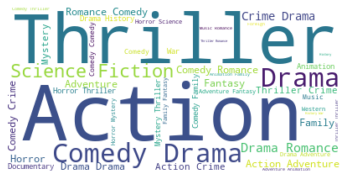

In [68]:
#Using word cloud on feature genres

%matplotlib inline

genre = train.genres[0:]

text = " ".join(genre for genreText in train.genres for genre in genreText)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off");

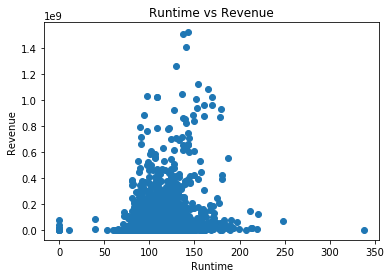

In [69]:
#Runtime vs Revenue Scatter Plots
%matplotlib inline
plt.scatter(train.runtime,train.revenue)
plt.title('Runtime vs Revenue')
plt.xlabel('Runtime')
plt.ylabel('Revenue');

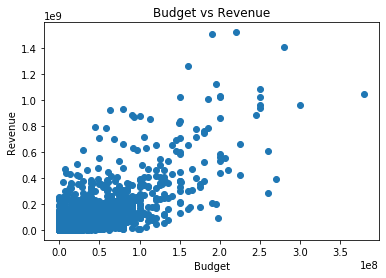

In [70]:
#Runtime vs Revenue Scatter Plots
%matplotlib inline
plt.scatter(train.budget,train.revenue)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');


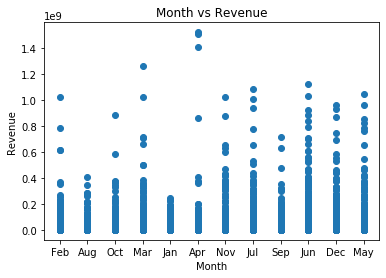

In [71]:
#Extracting month value

train['month']  = pd.DatetimeIndex(train['release_date']).month
test['month']  = pd.DatetimeIndex(test['release_date']).month


#fill na values in df['month']
train['month'] = train['month'].fillna((test.month.mean()))
test['month'] = test['month'].fillna((test.month.mean()))

#Scatter Plot of Revenue with month

%matplotlib inline
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

plt.scatter(train.month.map(monthDict),train.revenue)
plt.title('Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue');

In [72]:
#Printing first two rows of train dataset
train.head(2)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,month
0,1,14000000,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2
1,2,40000000,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8


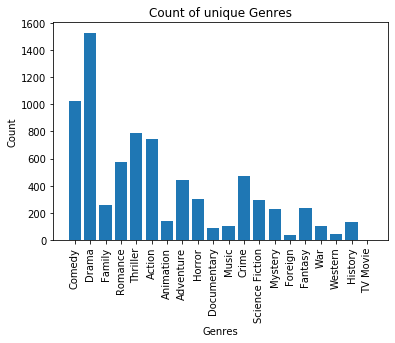

In [73]:
#Geeting  unique genres
dict_max_occuring_genre = {}

for val in train.genres:    
    for each_val in val:
        if(dict_max_occuring_genre.get(each_val) == None):
            dict_max_occuring_genre[each_val] = 1
        else:
            dict_max_occuring_genre[each_val] += 1


plt.bar(dict_max_occuring_genre.keys(), dict_max_occuring_genre.values())
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Count of unique Genres");

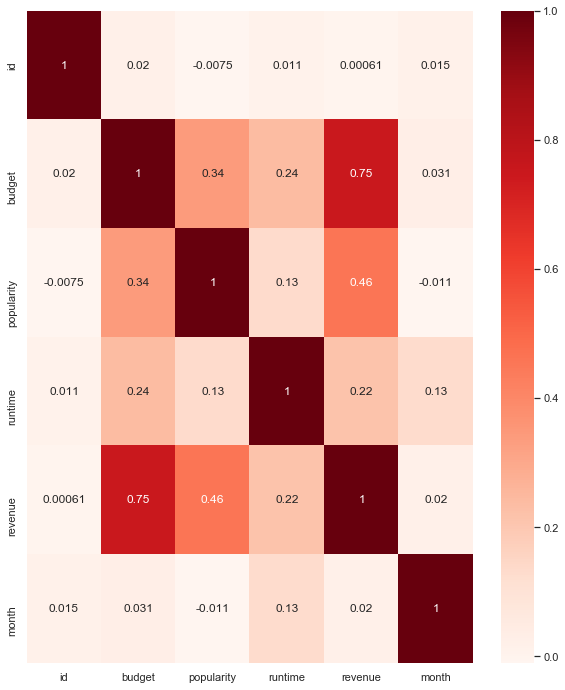

In [74]:
#Plotting correlation graph for train dataset
%matplotlib inline

sns.set()
plt.figure(figsize=(10,12))
cor = train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show();

In [75]:
#Converting categorial features genres into numbers

unique_genres = train.genres.apply(pd.Series).stack().unique()

genres_dummies = pd.get_dummies(train.genres.apply(pd.Series).stack()).sum(level=0)


genres_dummies = genres_dummies.drop(genres_dummies.columns[0],axis=1)


train = pd.concat([train,genres_dummies],axis=1)

train.head(2)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,[Comedy],tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,"[Comedy, Drama, Family, Romance]",tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,0,0,1,0,0,0,0,0


In [76]:
#Converting categorial features genres into numbers for test dataset

unique_genres = test.genres.apply(pd.Series).stack().unique()

genres_dummies = pd.get_dummies(test.genres.apply(pd.Series).stack()).sum(level=0)


genres_dummies = genres_dummies.drop(genres_dummies.columns[0],axis=1)


test = pd.concat([test,genres_dummies],axis=1)

#Printing first two rows of test dataset
test.head(2)

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,3001,0,"[Adventure, Animation, Family, Fantasy]",tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,...,0,0,0,0,0,0,0,0,0,0
1,3002,88000,"[Horror, Science Fiction]",tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...",...,0,0,1,0,0,0,1,0,0,0


In [77]:
#Removing features

train = train.drop(columns=['Keywords','cast','crew','imdb_id','genres','original_title','original_language','poster_path','production_companies','overview','spoken_languages','status','tagline','title','production_countries','release_date'])

test = test.drop(columns=['Keywords','cast','crew','imdb_id','genres','original_title','original_language','poster_path','production_companies','overview','spoken_languages','status','tagline','title','production_countries','release_date'])

#Printing first two rows of train dataset
train.head(2)

,id,budget,popularity,runtime,revenue,month,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,6.575393,93.0,12314651,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,8.248895,113.0,95149435,8,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [78]:
#Replacing the null values for runtime feature with mean of its value

train['runtime'] = train['runtime'].fillna((train['runtime'].mean()))
test['runtime'] = test['runtime'].fillna((test['runtime'].mean()))

In [79]:
#Printing first two rows of train dataset
train.head(2)

,id,budget,popularity,runtime,revenue,month,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,14000000,6.575393,93.0,12314651,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,8.248895,113.0,95149435,8,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [80]:
#Removing feature 'TV Movie' from train dataset since this feature is not present in the test dataset
train = train.drop(['TV Movie'],axis=1)

In [99]:
#Save Preprocessed data
train.to_csv("preprocessed_train_data.csv", index=False)
test.to_csv("preprocessed_test_data.csv", index=False)

In [82]:
#reading the saved train csv file
test_df_final = pd.read_csv('preprocessed_train_data.csv')

test_df_final.head()

,id,budget,popularity,runtime,revenue,month,Action,Adventure,Animation,Comedy,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,14000000,6.575393,93.0,12314651,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,8.248895,113.0,95149435,8,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,3300000,64.299990,105.0,13092000,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,3.174936,122.0,16000000,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0,1.148070,118.0,3923970,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
